In [33]:
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
import numpy as np
from numpy import vstack,array
from numpy.random import rand
import networkx as nx
from collections import Counter
import re

## Ideas for creativity driven task

1. Nodes with strongest connection - closest nodes
2. Biggest nodes
3. Top photo names (tags cloud)

## Average degree based on connection strength

In [34]:
Ns = list(range(1, 20, 2))

In [5]:
avg_dgs = []
for n in tqdm(Ns):
    G = get_graph(n)
    avg_dgs.append(avg_degree(G))

  0%|                                                                                           | 0/10 [00:00<?, ?it/s]


NameError: name 'get_graph' is not defined

ValueError: x and y must have same first dimension, but have shapes (10,) and (0,)

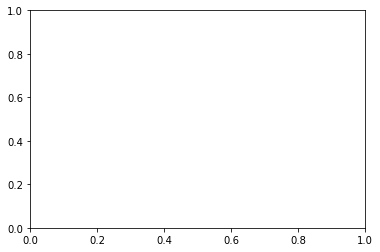

In [35]:
fig, ax = plt.subplots()
ax.plot(Ns, avg_dgs, label='Average degree')
leg = ax.legend();
plt.legend()
plt.xlabel('Connection strength n_conn')
plt.ylabel('Average degree')
plt.title('Average degree based on connection strength')
plt.show()

In [36]:
res = Counter(" ".join(dataset['name'].astype('string').fillna('-')).split()).most_common(60)
cloud = []
stop_words = ['the', 'The', 'for', 'For', 'near', 'and', 'RaPy', 'from']
for i in res:
    if (re.match('^[a-zA-Z]*$', i[0]) and (len(i[0]) > 2) and (i[0] not in stop_words)):
        cloud.append(i)

In [37]:
cloud

[('Finland', 2039),
 ('Ski', 923),
 ('Lapland', 912),
 ('World', 732),
 ('Toughest', 581),
 ('Hotel', 558),
 ('Ice', 555),
 ('Winter', 483),
 ('November', 461),
 ('Iisalmi', 417),
 ('Turku', 409),
 ('Sweden', 389),
 ('Norway', 380),
 ('Denmark', 356),
 ('Qualification', 356),
 ('Sunset', 318),
 ('Tampere', 311),
 ('Aurora', 300),
 ('Santa', 297),
 ('Northern', 284),
 ('Claus', 272)]

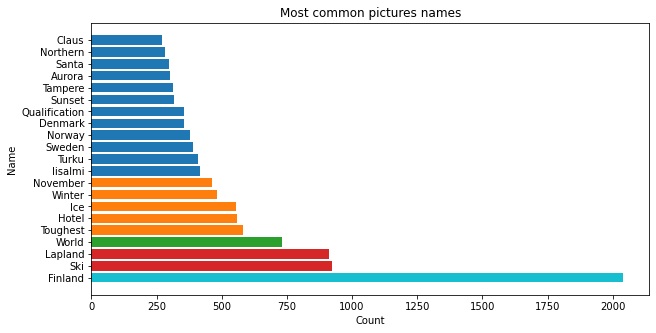

In [38]:
words, counts = zip(*cloud)

fig, ax = plt.subplots(figsize=(10, 5))
my_cmap = plt.get_cmap("tab10")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))
plt.barh(list(words), list(counts), color=my_cmap(rescale(list(counts))))

plt.title('Most common pictures names')
plt.ylabel('Name')
plt.xlabel('Count')
plt.show()

In [16]:
Counter(" ".join(dataset['region'].astype('string').fillna('None')).split()).most_common(20)

[('maakunta', 26769),
 ('Lapin', 10985),
 ('Län', 8742),
 ('Norrbottens', 6747),
 ('lääni', 5792),
 ('Fylke', 5038),
 ('Newland', 4696),
 ('North', 4647),
 ('Finnmark', 4055),
 ('Pohjois-pohjanmaan', 3982),
 ('Finland', 3653),
 ('Tampere', 3358),
 ('Ostrobothnia', 3090),
 ('Lapland', 3062),
 ('Petrograd', 2946),
 ('Pohjanmaan', 2766),
 ('Savo', 2415),
 ('Central', 2392),
 ('Pohjois-Savon', 2353),
 ('Västerbottens', 1995)]

In [32]:
dataset = pd.read_csv('../dataset/dataset_with_users_and_clusters.csv')
clusters = pd.read_csv('../dataset/clusters.csv')
clusters.index.name = 'cluster_id'
entries = pd.read_csv('../dataset/cluster_conenctions.csv')
def get_graph(n_conn):
    G = nx.Graph()
    for c in clusters.iterrows():
        G.add_node(c[0], pos=(c[1]['lon'], c[1]['lat']), label=c[1]['label'], size=c[1]['size'])
    for row in entries.iterrows():
        if row[1]['entries'] > n_conn: # gathering is considered to be more than 2 people
            G.add_edge(row[1]['cluster_id0'],
                   row[1]['cluster_id1'],
                   weight=row[1]['entries'])
    return G

def avg_degree(G):
    degrees = sorted([d for n, d in G.degree()], reverse=True)
    avg_degree = sum(degrees)/len(degrees)
    return avg_degree

In [22]:
cluster_top = clusters.sort_values(by=['size'], ascending=False).head(10)[['label', 'size']].values


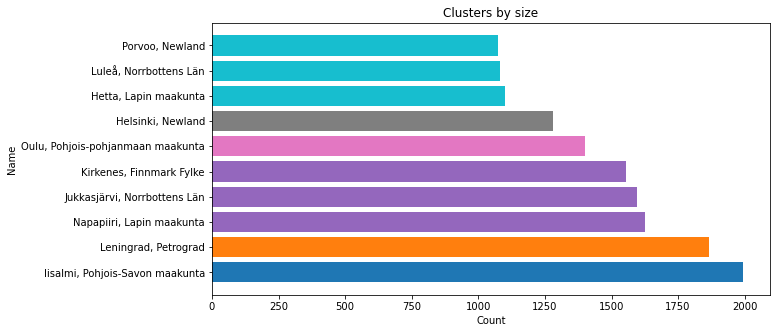

In [31]:
clust, counts = zip(*cluster_top)

fig, ax = plt.subplots(figsize=(10, 5))
my_cmap = plt.get_cmap("tab10_r")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))
plt.barh(list(clust), list(counts), color=my_cmap(rescale(list(counts))))

plt.title('Clusters by size')
plt.ylabel('Name')
plt.xlabel('Count')
plt.show()

In [78]:
routes_df = entries.sort_values(by=['entries'], ascending=False).head(10)
routes = []
weights = []
for r in routes_df.iterrows():
    c0 = clusters['label'].values[r[1]['cluster_id0']]
    c1 = clusters['label'].values[r[1]['cluster_id1']]
    size = r[1]['entries']
    s = str(c0) + ' — ' + str(c1)
    routes.append(s)
    weights.append(int(size))

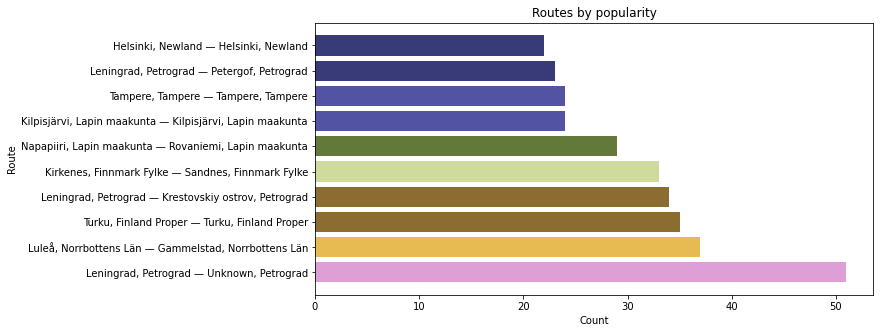

In [81]:
fig, ax = plt.subplots(figsize=(10, 5))
my_cmap = plt.get_cmap("tab20b")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))
plt.barh(list(routes), list(weights), color=my_cmap(rescale(list(weights))))
plt.title('Routes by popularity')
plt.ylabel('Route')
plt.xlabel('Count')
plt.show()